In [1]:
import pandas as pd

# URL 1

In [3]:
#Retrieving data from top5 european league players

url = "https://fbref.com/en/comps/Big5/stats/players/Big-5-European-Leagues-Stats"

#url = "https://fbref.com/en/comps/Big5/2023-2024/stats/players/2023-2024-Big-5-European-Leagues-Stats"

df = pd.read_html(url, attrs={"id": "stats_standard"}) 

#Getting the first item from the list
df = df[0]

#Dropping per 90 stats and creating our own later
df = df[df.columns.drop(list(df.filter(regex='Per 90')))]

#Dropping top header that we dont need
df = df.droplevel(0, axis = 1)

#Filtering for position, Forward
df = df[df['Pos'].str.contains('FW')]

#Filtering for players that have played more than 400 minutes
#Casting datatype to integer (number)
df = df[df['Min'].astype(int) > 900]

df.head()

,Rk,Player,Nation,Pos,Squad,Comp,Age,Born,MP,Starts,...,CrdY,CrdR,xG,npxG,xAG,npxG+xAG,PrgC,PrgP,PrgR,Matches
6,7,Himad Abdelli,dz ALG,"MF,FW",Angers,fr Ligue 1,25-085,1999,21,21,...,2,0,4.2,1.8,2.8,4.6,78,146,87,Matches
13,14,Matthis Abline,fr FRA,FW,Nantes,fr Ligue 1,21-319,2003,21,20,...,1,0,5.7,4.9,2.4,7.4,42,32,113,Matches
15,16,Zakaria Aboukhlal,ma MAR,"MF,FW",Toulouse,fr Ligue 1,24-358,2000,21,20,...,4,0,9.4,7.8,1.5,9.3,28,21,148,Matches
23,24,Akor Adams,ng NGA,FW,Montpellier,fr Ligue 1,25-012,2000,15,13,...,2,0,4.3,4.3,1.0,5.3,11,6,45,Matches
24,25,Che Adams,sct SCO,FW,Torino,it Serie A,28-212,1996,23,18,...,1,0,4.4,4.4,1.7,6.1,14,22,91,Matches


In [4]:
#Casting the data based on the metrics

df[['90s', 'npxG', 'xAG']] = df[['90s', 'npxG', 'xAG']].astype(float)

df[['Gls', 'Ast', 'PrgC', 'PrgP', 'PrgR']] = df[['Gls', 'Ast', 'PrgC', 'PrgP', 'PrgR']].astype(int)

In [5]:
#Calculating per 90 metrics

df['goals_per_90'] = df['Gls'] / df['90s']
df['npxG_per_90'] = df['npxG'] / df['90s']
df['assists_per_90'] = df['Ast'] / df['90s']
df['xAG_per_90'] = df['xAG'] / df['90s']
df['progressive_carries_per_90'] = df['PrgC'] / df['90s']
df['progressive_passes_per_90'] = df['PrgP'] / df['90s']
df['progressive_receptions_per_90'] = df['PrgR'] / df['90s']

In [6]:
df.columns

Index(['Rk', 'Player', 'Nation', 'Pos', 'Squad', 'Comp', 'Age', 'Born', 'MP',
       'Starts', 'Min', '90s', 'Gls', 'Ast', 'G+A', 'G-PK', 'PK', 'PKatt',
       'CrdY', 'CrdR', 'xG', 'npxG', 'xAG', 'npxG+xAG', 'PrgC', 'PrgP', 'PrgR',
       'Matches', 'goals_per_90', 'npxG_per_90', 'assists_per_90',
       'xAG_per_90', 'progressive_carries_per_90', 'progressive_passes_per_90',
       'progressive_receptions_per_90'],
      dtype='object')

In [7]:
standard_stats = df[['Player', 'Nation', 'Pos', 'Squad', 'Age', 'Min',
                     'goals_per_90', 'npxG_per_90', 'assists_per_90',
                       'xAG_per_90', 'progressive_carries_per_90', 
                     'progressive_passes_per_90','progressive_receptions_per_90']]

In [8]:
standard_stats.dtypes

Player                            object
Nation                            object
Pos                               object
Squad                             object
Age                               object
Min                               object
goals_per_90                     float64
npxG_per_90                      float64
assists_per_90                   float64
xAG_per_90                       float64
progressive_carries_per_90       float64
progressive_passes_per_90        float64
progressive_receptions_per_90    float64
dtype: object

# URL 2

In [10]:
url_2 = 'https://fbref.com/en/comps/Big5/gca/players/Big-5-European-Leagues-Stats'

df2 = pd.read_html(url_2, attrs={"id": "stats_gca"}) 

#Getting the first item from the list
df2 = df2[0]

#Dropping per 90 stats and creating our own later
df2 = df2[df2.columns.drop(list(df2.filter(regex='Per 90')))]

#Dropping top header that we dont need
df2 = df2.droplevel(0, axis = 1)

#Filtering for position, Forward
df2 = df2[df2['Pos'].str.contains('FW')]

#Filtering for players that have played more than 400 minutes
#Casting datatype to integer (number)
#df = df[df['Min'].astype(int) > 900]

df2.head()


,Rk,Player,Nation,Pos,Squad,Comp,Age,Born,90s,SCA,...,Def,GCA,GCA90,PassLive,PassDead,TO,Sh,Fld,Def,Matches
4,5,Keyliane Abdallah,fr FRA,FW,Marseille,fr Ligue 1,18-311,2006,0.0,0,...,0,0,0.00,0,0,0,0,0,0,Matches
6,7,Himad Abdelli,dz ALG,"MF,FW",Angers,fr Ligue 1,25-085,1999,20.7,64,...,2,2,0.10,1,0,1,0,0,0,Matches
13,14,Matthis Abline,fr FRA,FW,Nantes,fr Ligue 1,21-319,2003,18.6,41,...,0,5,0.27,3,0,2,0,0,0,Matches
15,16,Zakaria Aboukhlal,ma MAR,"MF,FW",Toulouse,fr Ligue 1,24-358,2000,18.5,29,...,1,6,0.32,3,0,1,0,2,0,Matches
17,18,Tammy Abraham,eng ENG,FW,Roma,it Serie A,27-131,1997,0.0,0,...,0,0,0.00,0,0,0,0,0,0,Matches


In [11]:
df2.columns

Index(['Rk', 'Player', 'Nation', 'Pos', 'Squad', 'Comp', 'Age', 'Born', '90s',
       'SCA', 'SCA90', 'PassLive', 'PassDead', 'TO', 'Sh', 'Fld', 'Def', 'GCA',
       'GCA90', 'PassLive', 'PassDead', 'TO', 'Sh', 'Fld', 'Def', 'Matches'],
      dtype='object')

In [12]:
gca_stats = df2[['Player', 'GCA90', 'SCA90']]

In [13]:
gca_stats[['GCA90', 'SCA90']] = gca_stats[['GCA90', 'SCA90']].astype(float)

/var/folders/dv/7l2p8f4j2gbcl552tflf3zw40000gn/T/ipykernel_49123/45896133.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gca_stats[['GCA90', 'SCA90']] = gca_stats[['GCA90', 'SCA90']].astype(float)


In [14]:
gca_stats.dtypes

Player     object
GCA90     float64
SCA90     float64
dtype: object

# URL 3

In [16]:
url_3 = 'https://fbref.com/en/comps/Big5/shooting/players/Big-5-European-Leagues-Stats'

df3 = pd.read_html(url_3, attrs={"id": "stats_shooting"}) 

#Getting the first item from the list
df3 = df3[0]

#Dropping per 90 stats and creating our own later
df3 = df3[df3.columns.drop(list(df3.filter(regex='Per 90')))]

#Dropping top header that we dont need
df3 = df3.droplevel(0, axis = 1)

#Filtering for position, Forward
df3 = df3[df3['Pos'].str.contains('FW')]

#Filtering for players that have played more than 400 minutes
#Casting datatype to integer (number)
#df = df[df['Min'].astype(int) > 900]

df3.head()


,Rk,Player,Nation,Pos,Squad,Comp,Age,Born,90s,Gls,...,Dist,FK,PK,PKatt,xG,npxG,npxG/Sh,G-xG,np:G-xG,Matches
4,5,Keyliane Abdallah,fr FRA,FW,Marseille,fr Ligue 1,18-311,2006,0.0,0,...,NaN,0,0,0,0.0,0.0,NaN,0.0,0.0,Matches
6,7,Himad Abdelli,dz ALG,"MF,FW",Angers,fr Ligue 1,25-085,1999,20.7,4,...,24.6,0,2,3,4.2,1.8,0.09,-0.2,+0.2,Matches
13,14,Matthis Abline,fr FRA,FW,Nantes,fr Ligue 1,21-319,2003,18.6,6,...,14.2,0,1,1,5.7,4.9,0.09,+0.3,+0.1,Matches
15,16,Zakaria Aboukhlal,ma MAR,"MF,FW",Toulouse,fr Ligue 1,24-358,2000,18.5,6,...,14.0,0,1,2,9.4,7.8,0.15,-3.4,-2.8,Matches
17,18,Tammy Abraham,eng ENG,FW,Roma,it Serie A,27-131,1997,0.0,0,...,NaN,0,0,0,0.0,0.0,NaN,0.0,0.0,Matches


In [17]:
df3.columns

Index(['Rk', 'Player', 'Nation', 'Pos', 'Squad', 'Comp', 'Age', 'Born', '90s',
       'Gls', 'Sh', 'SoT', 'SoT%', 'Sh/90', 'SoT/90', 'G/Sh', 'G/SoT', 'Dist',
       'FK', 'PK', 'PKatt', 'xG', 'npxG', 'npxG/Sh', 'G-xG', 'np:G-xG',
       'Matches'],
      dtype='object')

In [18]:
shot_stats = df3[['Player', 'Sh/90', 'SoT/90']]

In [19]:
shot_stats[['Sh/90', 'SoT/90']] = shot_stats[['Sh/90', 'SoT/90']].astype(float)

/var/folders/dv/7l2p8f4j2gbcl552tflf3zw40000gn/T/ipykernel_49123/3799132011.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  shot_stats[['Sh/90', 'SoT/90']] = shot_stats[['Sh/90', 'SoT/90']].astype(float)


In [20]:
shot_stats.head()

,Player,Sh/90,SoT/90
4,Keyliane Abdallah,0.00,0.00
6,Himad Abdelli,0.97,0.24
13,Matthis Abline,2.79,1.02
15,Zakaria Aboukhlal,2.75,1.19
17,Tammy Abraham,0.00,0.00


# Merge

In [22]:
merged_df = standard_stats.merge(gca_stats, on='Player', how='inner')

merged_df.head()

,Player,Nation,Pos,Squad,Age,Min,goals_per_90,npxG_per_90,assists_per_90,xAG_per_90,progressive_carries_per_90,progressive_passes_per_90,progressive_receptions_per_90,GCA90,SCA90
0,Himad Abdelli,dz ALG,"MF,FW",Angers,25-085,1862,0.193237,0.086957,0.048309,0.135266,3.768116,7.053140,4.202899,0.10,3.09
1,Matthis Abline,fr FRA,FW,Nantes,21-319,1675,0.322581,0.263441,0.053763,0.129032,2.258065,1.720430,6.075269,0.27,2.20
2,Zakaria Aboukhlal,ma MAR,"MF,FW",Toulouse,24-358,1668,0.324324,0.421622,0.108108,0.081081,1.513514,1.135135,8.000000,0.32,1.56
3,Akor Adams,ng NGA,FW,Montpellier,25-012,1075,0.252101,0.361345,0.084034,0.084034,0.924370,0.504202,3.781513,0.00,0.00
4,Akor Adams,ng NGA,FW,Montpellier,25-012,1075,0.252101,0.361345,0.084034,0.084034,0.924370,0.504202,3.781513,0.42,2.09


In [23]:
merged_df = merged_df.merge(shot_stats, on='Player', how='inner')

In [24]:
merged_df.columns

Index(['Player', 'Nation', 'Pos', 'Squad', 'Age', 'Min', 'goals_per_90',
       'npxG_per_90', 'assists_per_90', 'xAG_per_90',
       'progressive_carries_per_90', 'progressive_passes_per_90',
       'progressive_receptions_per_90', 'GCA90', 'SCA90', 'Sh/90', 'SoT/90'],
      dtype='object')

# Radar

In [36]:
from mplsoccer import Radar
from mplsoccer import PyPizza
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

import matplotlib.font_manager as font_manager

font_path = 'Arvo-Regular.ttf'
font_props = font_manager.FontProperties(fname=font_path)

#Percentiles calculation 

merged_df['Goals'] = (merged_df['goals_per_90'].rank(pct=True) * 100).astype(int)
merged_df['NPxG'] = (merged_df['npxG_per_90'].rank(pct=True) * 100).astype(int)
merged_df['Assists'] = (merged_df['assists_per_90'].rank(pct=True) * 100).astype(int)
merged_df['xAG'] = (merged_df['xAG_per_90'].rank(pct=True) * 100).astype(int)
merged_df['Prog Carries'] = (merged_df['progressive_carries_per_90'].rank(pct=True) * 100).astype(int)
merged_df['Prog Passes'] = (merged_df['progressive_passes_per_90'].rank(pct=True) * 100).astype(int)
merged_df['Prog Receptions'] = (merged_df['progressive_receptions_per_90'].rank(pct=True) * 100).astype(int)
merged_df['GCA'] = (merged_df['GCA90'].rank(pct=True) * 100).astype(int)
merged_df['SCA90'] = (merged_df['SCA90'].rank(pct=True) * 100).astype(int)
merged_df['Shots'] = (merged_df['Sh/90'].rank(pct=True) * 100).astype(int)
merged_df['Shots On Target'] = (merged_df['SoT/90'].rank(pct=True) * 100).astype(int)

#Filtering and sorting which columns to use in radar
columns_to_plot = [
    'Goals', 'Assists', 'NPxG', 'xAG',
    'Prog Carries', 'Prog Passes', 'Prog Receptions',
    'GCA', 'SCA90', 'Shots', 'Shots On Target'
]

#Creating min and max value for radar
radar = Radar(
    params=columns_to_plot,
    min_range=[0 for _ in columns_to_plot],
    max_range=[100 for _ in columns_to_plot]
)

slice_colors = ["#004170"] * 4 + ["#ceab5d"] * 3 + ["#DA291C"] * 4
#text_colors = ["white"]*9

#004170  #ceab5d   #DA291C

#Players to plot
retegui = merged_df[merged_df['Player'] == 'Mateo Retegui']
dembele = merged_df[merged_df['Player'] == 'Ousmane Dembélé']
emegha = merged_df[merged_df['Player'] == 'Emanuel Emegha']


<Axes: >

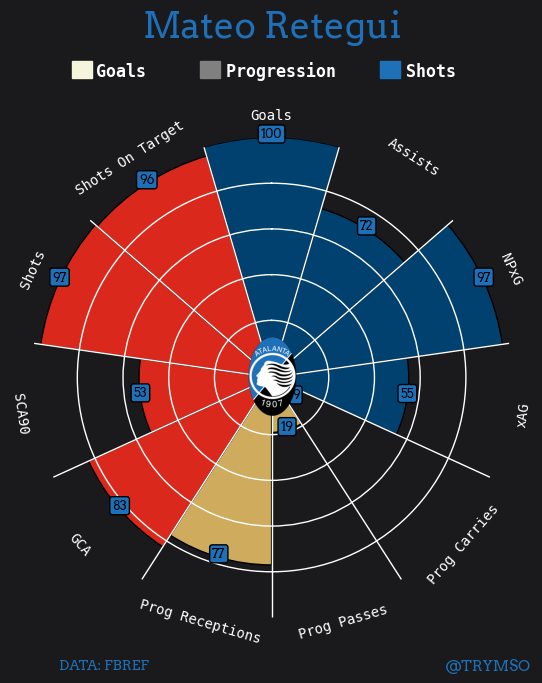

In [38]:
# Setup the pizza plot
pizza = PyPizza(
    params=columns_to_plot,
    background_color='#1A1A1D',
    straight_line_color='white',
    straight_line_lw=1,
    last_circle_lw=0,
    other_circle_color='white',
    other_circle_ls='-',
    other_circle_lw=1
)

# Create the figure and plot
fig, ax = pizza.make_pizza(
    figsize=(8, 8),  # Increase the figure size
    slice_colors=slice_colors, 
    values=list(retegui[columns_to_plot].values.flatten()),
    kwargs_values=dict(
        color='#000000', fontsize=9, fontproperties=font_props, 
        bbox={
            'edgecolor': 'black',
            'facecolor': '#1e71b8',    #A52A2A  #8B0000
            "boxstyle": 'round, pad= .2',
            "lw": 1
        }
    ),

    kwargs_slices=dict(
        facecolor="#FFFFFF",  # New color (example: red)
        edgecolor="black",  # White edge for the slices
        linewidth=1
    ),

    kwargs_params=dict(
        color='#FFFFFF',  # White color for the labels (change as needed)
        fontsize=10,  # Font size for the labels
        fontproperties='monospace' # Custom font
    )
)

# Adjust the margins to add space around the plot
fig.subplots_adjust(top=0.8, bottom=0.2, left=0.2, right=0.8)  # Adjust as needed for space around the figure



# Add the title
ax.text(x=.5, y=1.23, s='Mateo Retegui', fontsize=26, weight='bold', c='#1e71b8', ha='center', fontproperties=font_props, va='center', transform=ax.transAxes)


ax.text(
    x=.15, y=-0.1,  # Position below the plot (adjust y as needed)
    s='DATA: FBREF',  # Example subtext
    fontsize=11,  # Smaller font size for subtext
    color='#1e71b8',  # Subtext color (white in this example)
    ha='center', 
    va='center', 
    fontproperties=font_props,
    weight='bold',
    transform=ax.transAxes
)


ax.text(
    x=.95, y=-0.1,  # Position below the plot (adjust y as needed)
    s='@TRYMSO',  # Example subtext
    fontsize=11,  # Smaller font size for subtext
    color='#1e71b8',  # Subtext color (white in this example)
    ha='center', 
    va='center', 
    weight='bold',
    fontproperties=font_props, 
    transform=ax.transAxes
)




import matplotlib.pyplot as plt
from PIL import Image
from mplsoccer import Radar, add_image


# add text
fig.text(
    0.28, 0.877, "Goals        Progression       Shots", size=12,
    fontproperties='monospace', weight='bold', color="white"
)

# add rectangles
fig.patches.extend([
    plt.Rectangle(
        (0.25, 0.875), 0.025, 0.021, fill=True, color="beige",
        transform=fig.transFigure, figure=fig
    ),
    plt.Rectangle(
        (0.41, 0.875), 0.025, 0.021, fill=True, color="grey",
        transform=fig.transFigure, figure=fig
    ),
    plt.Rectangle(
        (0.635, 0.875), 0.025, 0.021, fill=True, color="#1e71b8",
        transform=fig.transFigure, figure=fig
    ),
])


# Load your team logo
chelsea_logo_path = "/Users/trymso/Desktop/atalanta_logo.webp"
chelsea_logo = Image.open(chelsea_logo_path)

add_image(chelsea_logo, fig, left=0.45, bottom=0.45, width=0.1, height=0.1)


In [ ]:
fig.savefig('/Users/Trymso/Desktop/Retegui_radar.png', dpi=300, bbox_inches='tight') #remove (#) if you wanna save to desktop

<Axes: >

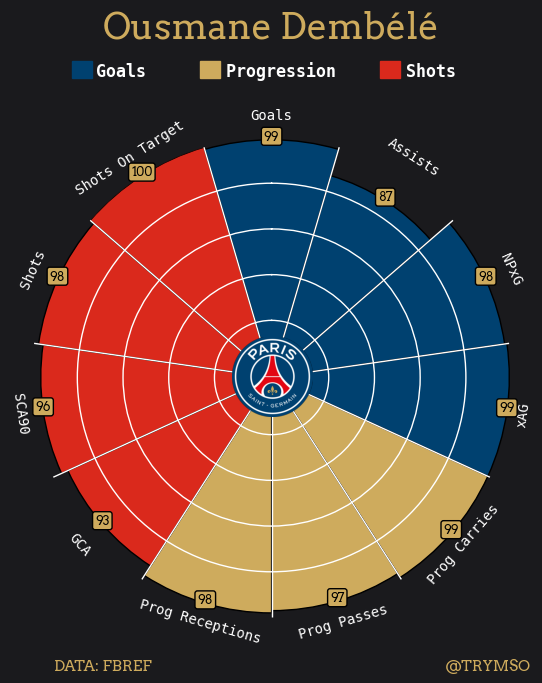

In [42]:
# Setup the pizza plot
pizza = PyPizza(
    params=columns_to_plot,
    background_color='#1A1A1D',
    straight_line_color='white',
    straight_line_lw=1,
    last_circle_lw=0,
    other_circle_color='white',
    other_circle_ls='-',
    other_circle_lw=1
)

# Create the figure and plot
fig, ax = pizza.make_pizza(
    figsize=(8, 8),  # Increase the figure size
    slice_colors=slice_colors, 
    values=list(dembele[columns_to_plot].values.flatten()),
    kwargs_values=dict(
        color='#000000', fontsize=9, fontproperties=font_props, 
        bbox={
            'edgecolor': 'black',
            'facecolor': '#ceab5d',    #A52A2A  #8B0000
            "boxstyle": 'round, pad= .2',
            "lw": 1
        }
    ),

    kwargs_slices=dict(
        facecolor="#FFFFFF",  # New color (example: red)
        edgecolor="black",  # White edge for the slices
        linewidth=1
    ),

    kwargs_params=dict(
        color='#FFFFFF',  # White color for the labels (change as needed)
        fontsize=10,  # Font size for the labels
        fontproperties='monospace' # Custom font
    )
)

# Adjust the margins to add space around the plot
fig.subplots_adjust(top=0.8, bottom=0.2, left=0.2, right=0.8)  # Adjust as needed for space around the figure



# Add the title
ax.text(x=.5, y=1.23, s='Ousmane Dembélé', fontsize=26, weight='bold', c='#ceab5d', ha='center', fontproperties=font_props, va='center', transform=ax.transAxes)


ax.text(
    x=.15, y=-0.1,  # Position below the plot (adjust y as needed)
    s='DATA: FBREF',  # Example subtext
    fontsize=11,  # Smaller font size for subtext
    color='#ceab5d',  # Subtext color (white in this example)
    ha='center', 
    va='center', 
    fontproperties=font_props,
    weight='bold',
    transform=ax.transAxes
)


ax.text(
    x=.95, y=-0.1,  # Position below the plot (adjust y as needed)
    s='@TRYMSO',  # Example subtext
    fontsize=11,  # Smaller font size for subtext
    color='#ceab5d',  # Subtext color (white in this example)
    ha='center', 
    va='center', 
    weight='bold',
    fontproperties=font_props, 
    transform=ax.transAxes
)




import matplotlib.pyplot as plt
from PIL import Image
from mplsoccer import Radar, add_image


# add text
fig.text(
    0.28, 0.877, "Goals        Progression       Shots", size=12,
    fontproperties='monospace', weight='bold', color="white"
)

# add rectangles
fig.patches.extend([
    plt.Rectangle(
        (0.25, 0.875), 0.025, 0.021, fill=True, color="#004170",
        transform=fig.transFigure, figure=fig
    ),
    plt.Rectangle(
        (0.41, 0.875), 0.025, 0.021, fill=True, color="#ceab5d",
        transform=fig.transFigure, figure=fig
    ),
    plt.Rectangle(
        (0.635, 0.875), 0.025, 0.021, fill=True, color="#DA291C",
        transform=fig.transFigure, figure=fig
    ),
])
        

# Load your team logo
chelsea_logo_path = "/Users/trymso/Desktop/psg_logo.webp"
chelsea_logo = Image.open(chelsea_logo_path)

add_image(chelsea_logo, fig, left=0.45, bottom=0.45, width=0.1, height=0.1)



In [44]:
fig.savefig('/Users/Trymso/Desktop/dembele_radar.png', dpi=300, bbox_inches='tight') #remove (#) if you wanna save to desktop

In [ ]:
# Setup the pizza plot
pizza = PyPizza(
    params=columns_to_plot,
    background_color='#1A1A1D',
    straight_line_color='white',
    straight_line_lw=1,
    last_circle_lw=0,
    other_circle_color='white',
    other_circle_ls='-',
    other_circle_lw=1
)

# Create the figure and plot
fig, ax = pizza.make_pizza(
    figsize=(8, 8),  # Increase the figure size
    slice_colors=slice_colors, 
    values=list(emegha[columns_to_plot].values.flatten()),
    kwargs_values=dict(
        color='#000000', fontsize=9, fontproperties=font_props, 
        bbox={
            'edgecolor': 'black',
            'facecolor': '#DC2F34',    #A52A2A  #8B0000
            "boxstyle": 'round, pad= .2',
            "lw": 1
        }
    ),

    kwargs_slices=dict(
        facecolor="#FFFFFF",  # New color (example: red)
        edgecolor="black",  # White edge for the slices
        linewidth=1
    ),

    kwargs_params=dict(
        color='#FFFFFF',  # White color for the labels (change as needed)
        fontsize=10,  # Font size for the labels
        fontproperties='monospace' # Custom font
    )
)

# Adjust the margins to add space around the plot
fig.subplots_adjust(top=0.8, bottom=0.2, left=0.2, right=0.8)  # Adjust as needed for space around the figure



# Add the title
ax.text(x=.5, y=1.23, s='Emanuel Emegha', fontsize=26, weight='bold', c='#DC2F34', ha='center', fontproperties=font_props, va='center', transform=ax.transAxes)


ax.text(
    x=.15, y=-0.1,  # Position below the plot (adjust y as needed)
    s='DATA: FBREF',  # Example subtext
    fontsize=11,  # Smaller font size for subtext
    color='#DC2F34',  # Subtext color (white in this example)
    ha='center', 
    va='center', 
    fontproperties=font_props,
    weight='bold',
    transform=ax.transAxes
)


ax.text(
    x=.95, y=-0.1,  # Position below the plot (adjust y as needed)
    s='@TRYMSO',  # Example subtext
    fontsize=11,  # Smaller font size for subtext
    color='#DC2F34',  # Subtext color (white in this example)
    ha='center', 
    va='center', 
    weight='bold',
    fontproperties=font_props, 
    transform=ax.transAxes
)




import matplotlib.pyplot as plt
from PIL import Image
from mplsoccer import Radar, add_image


# add text
fig.text(
    0.28, 0.877, "Goals        Progression       Shots", size=12,
    fontproperties='monospace', weight='bold', color="white"
)

# add rectangles
fig.patches.extend([
    plt.Rectangle(
        (0.25, 0.875), 0.025, 0.021, fill=True, color="#009FE3",
        transform=fig.transFigure, figure=fig
    ),
    plt.Rectangle(
        (0.41, 0.875), 0.025, 0.021, fill=True, color="#DC2F34",
        transform=fig.transFigure, figure=fig
    ),
    plt.Rectangle(
        (0.635, 0.875), 0.025, 0.021, fill=True, color="#004996",
        transform=fig.transFigure, figure=fig
    ),
])


# Load your team logo
chelsea_logo_path = "/Users/trymso/Desktop/stras_logo.png"
chelsea_logo = Image.open(chelsea_logo_path)

add_image(chelsea_logo, fig, left=0.45, bottom=0.45, width=0.1, height=0.1)



In [ ]:
fig.savefig('/Users/Trymso/Desktop/emegha_radar.png', dpi=300, bbox_inches='tight') #remove (#) if you wanna save to desktop